In [1]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from global_land_mask import globe
import scipy.stats as stats

In [2]:
# Load datasets
dataset_path = '/data/fast1/surface-load/'
ds = xr.open_dataset(dataset_path + "GRCTellus.JPL.200204_202102.GLO.RL06M.MSCNv02CRI.nc")
# catalog = pd.read_csv('eq_200204_202102.csv')
# catalog["time"] = catalog["time"].astype("datetime64")
catalog = pd.read_csv(dataset_path + 'ind_and_bg_probs.csv')
catalog["time"] = catalog["time"].astype("datetime64")

In [3]:
def get_mass(eq):
    mass_change = ds.sel(lat=(eq["latitude"]),lon=(eq["longitude"]),time=(eq["time"]), method="nearest")
    mass_change = mass_change["lwe_thickness"]
    return mass_change.data
  
catalog['dmass'] = catalog.apply(lambda row: get_mass(row), axis=1)

In [4]:
# catalog['on_land'] = globe.is_land(catalog.latitude, catalog.longitude)

In [6]:
def plot_hist(all_time_periods, earthquake_only):
    
    fig,ax = plt.subplots(1, 2, figsize=(15,5))
    ax = plt.subplot(1,2,1)
    
    plt.style.use('fivethirtyeight')
    bins = np.histogram(earthquake_only, 40)[1]
    ax.hist(earthquake_only, bins, density = True, cumulative=True, histtype='step',
            label='Time periods with any earthquake',linewidth=1.5)
    ax.hist(all_time_periods, bins, density = True, cumulative=True,histtype='step',
            label='All time periods',linewidth=1.5)
    ax.set_ylim((-0.1,1.3))
    ax.legend()
    
    ax = plt.subplot(1,2,2)
    ax.hist(earthquake_only, bins, density = True, cumulative=False, histtype='step',
            label='Time periods with any earthquake',linewidth=1.5)
    ax.hist(all_time_periods, bins, density = True, cumulative=False,histtype='step',
            label='All time periods',linewidth=1.5)
    ax.set_ylim((-0.05,0.2))
    ax.set_xlim((-40,60))
    ax.legend()

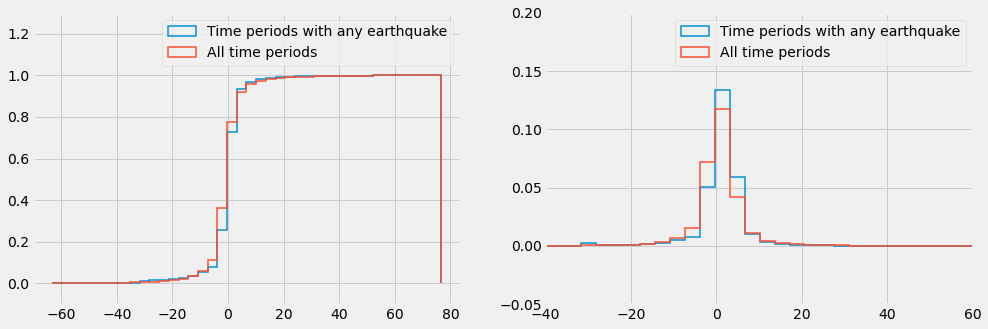

In [7]:
plot_hist(ds['lwe_thickness'].data.flatten(),catalog['dmass'])

In [7]:
# What is the probability that the two results are the same?
# if p-value < significance level, reject that samples are from same distribution


# a = np.array(catalog[catalog['P_triggered'] < 0.9]['dmass'])
# b = np.array(ds['lwe_thickness'].data.flatten())
# stats.ks_2samp(a,b, mode='asymp')
# output: KstestResult(statistic=0.04963563191122192, pvalue=0.1566585634353047)

# a = np.array(catalog.dmass)
# b =  np.array(ds['lwe_thickness'].data.flatten())
# stats.ks_2samp(, d, mode='asymp')
# output: KstestResult(statistic=0.12212035878155786, pvalue=2.4886704147936648e-123)

In [18]:
def calc_stats(a,b):
    '''
    Calculate stats for the distributions a and b
    a: distribution during earthquakes
    b: distribution over all time periods
    '''
    
    result = {}
#     result['cvm'] = stats.cramervonmises_2samp(a, b, method='auto')
    result['median_all'] = np.median(b)
    result['median_eq'] = np.median(a)
    
    return result
    
stats = calc_stats(np.array(catalog.dmass),np.array(ds['lwe_thickness'].data.flatten()))


{'median_all': 0.6627782418257632, 'median_eq': 1.425528633547053}

## Correlation between reconstructed D values and seismic activity


In [11]:
# Loading D values from pca grace

D_eq_values = []
for filenumber in np.arange(1,3):
    D_eq_values.append( np.loadtxt('D_eq_%d.csv'%filenumber, delimiter=',') )
    # asumes filenames like 'D_eq_values_1.csv', 'D_eq_values_2.csv', and so on

    # 2. follow the same format as in the above line, but for D
#     D = np.loadtxt('D.csv', delimiter=',')
    
#     3. call the function to make figures with D and D_eq_values

In [13]:
D_eq_values[0]

array([ 4.25953655,  4.25953655,  4.25953655, ..., -0.89574501,
       -0.21415966, -0.29122169])

In [57]:
# Loading D values from pca grace

# D_1 = np.loadtxt('D_1.csv', delimiter=',')
# D_2 = np.loadtxt('D_2.csv', delimiter=',')
# D_3 = np.loadtxt('D_3.csv', delimiter=',')
# D_4 = np.loadtxt('D_4.csv', delimiter=',')
# D_5 = np.loadtxt('D_5.csv', delimiter=',')
# D_6 = np.loadtxt('D_6.csv', delimiter=',')

# D_eq_1 = np.loadtxt('D_eq_1.csv', delimiter=',')
# D_eq_2 = np.loadtxt('D_eq_2.csv', delimiter=',')
# D_eq_3 = np.loadtxt('D_eq_3.csv', delimiter=',')
# D_eq_4 = np.loadtxt('D_eq_4.csv', delimiter=',')
# D_eq_5 = np.loadtxt('D_eq_5.csv', delimiter=',')
# D_eq_6 = np.loadtxt('D_eq_6.csv', delimiter=',')

In [20]:
D_1

NameError: name 'D_1' is not defined

In [16]:
D = np.array(D)
D_eq_values = np.array(D_eq_values)

In [ ]:
# 1. reWrite the following cell as a function

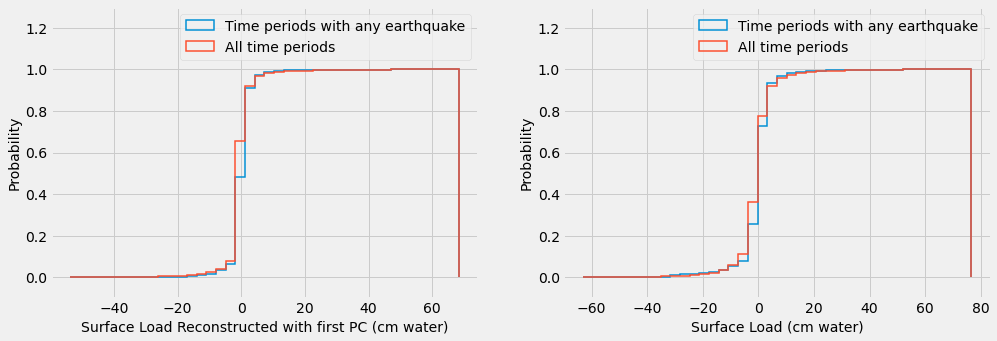

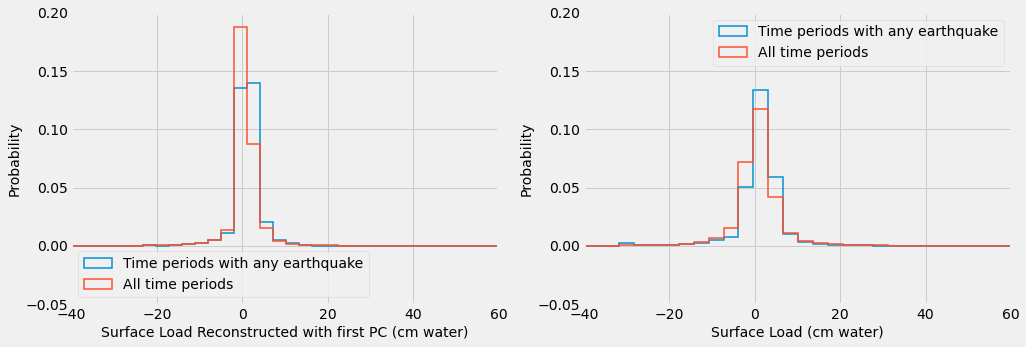

In [75]:

# reconstructed values

plt.style.use('fivethirtyeight')
bins = np.histogram(D_eq_1, 40)[1]
fig,ax = plt.subplots(figsize=(15,5))
ax = plt.subplot(1,2,1)
ax.hist(D_eq_1, bins, density = True, cumulative=True, histtype='step',
            label='Time periods with any earthquake',linewidth=1.5)
ax.hist(D_1.flatten(), bins, density = True, cumulative=True,histtype='step',
            label='All time periods',linewidth=1.5)
plt.xlabel('Surface Load Reconstructed with first PC (cm water)', fontsize = 14)
plt.ylabel('Probability', fontsize = 14)
# ax.set_ylim((1e-5,5))
ax.set_ylim((-0.1,1.3))
# ax.set_yscale('log')
ax.legend()

# original values

bins = np.histogram(catalog['dmass'], 40)[1]
ax = plt.subplot(1,2,2)
ax.hist(np.array(catalog['dmass']), bins, density = True, cumulative=True, histtype='step',
            label='Time periods with any earthquake',linewidth=1.5)
ax.hist(ds['lwe_thickness'].data.flatten(), bins, density = True, cumulative=True,histtype='step',
            label='All time periods',linewidth=1.5)
plt.xlabel('Surface Load (cm water)', fontsize = 14)
plt.ylabel('Probability', fontsize = 14)
# ax.set_ylim((1e-5,5))
ax.set_ylim((-0.1,1.3))
# ax.set_yscale('log')
ax.legend()

# reconstructed values

bins = np.histogram(D_eq_values, 40)[1]
fig,ax = plt.subplots(1, 2, figsize=(15,5))
ax = plt.subplot(1,2,1)
ax.hist(D_eq_values, bins, density = True, cumulative=False, histtype='step',
            label='Time periods with any earthquake',linewidth=1.5)
ax.hist(D.flatten(), bins, density = True, cumulative=False,histtype='step',
            label='All time periods',linewidth=1.5)
plt.xlabel('Surface Load Reconstructed with first PC (cm water)', fontsize = 14)
plt.ylabel('Probability', fontsize = 14)
# ax.set_ylim((1e-5,5))
ax.set_ylim((-0.05,0.2))
ax.set_xlim((-40,60))
# ax.set_yscale('log')
ax.legend()

# original values

bins = np.histogram(catalog['dmass'], 40)[1]
ax = plt.subplot(1,2,2)
ax.hist(np.array(catalog['dmass']), bins, density = True, cumulative=False, histtype='step',
            label='Time periods with any earthquake',linewidth=1.5)
ax.hist(ds['lwe_thickness'].data.flatten(), bins, density = True, cumulative=False,histtype='step',
            label='All time periods',linewidth=1.5)
plt.xlabel('Surface Load (cm water)', fontsize = 14)
plt.ylabel('Probability', fontsize = 14)
# ax.set_ylim((1e-5,5))
ax.set_ylim((-0.05,0.2))
ax.set_xlim((-40,60))
# ax.set_yscale('log')
ax.legend()

In [21]:
np.median(D.flatten())

0.3595983278020353

In [22]:
np.median(D_eq_values.flatten())

1.3031345620154222

In [99]:
# def plot_hist_recon(all_time_periods, earthquake_only):
    
#     fig,ax = plt.subplots(1, 2, figsize=(15,5))
#     ax = plt.subplot(1,2,1)
    
#     plt.style.use('fivethirtyeight')
#     bins = np.histogram(earthquake_only, 40)[1]
#     ax.hist(earthquake_only, bins, density = True, cumulative=True, histtype='step',
#             label='Time periods with any earthquake',linewidth=1.5)
#     ax.hist(all_time_periods.flatten(), bins, density = True, cumulative=True,histtype='step',
#             label='All time periods',linewidth=1.5)
#     ax.set_ylim((-0.1,1.3))
#     ax.legend()
    
#     ax = plt.subplot(1,2,2)
#     ax.hist(earthquake_only, bins, density = True, cumulative=False, histtype='step',
#             label='Time periods with any earthquake',linewidth=1.5)
#     ax.hist(all_time_periods.flatten(), bins, density = True, cumulative=False,histtype='step',
#             label='All time periods',linewidth=1.5)
#     ax.set_ylim((-0.05,0.2))
#     ax.set_xlim((-40,60))
#     ax.legend()

In [19]:
plot_hist(D_1, D_eq_1)
plot_hist(D_2, D_eq_2)
plot_hist(D_3, D_eq_3)
plot_hist(D_4, D_eq_4)
plot_hist(D_5, D_eq_5)
plot_hist(D_6, D_eq_6)

NameError: name 'D_1' is not defined